In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import warnings
import re

In [2]:
df = pd.read_csv('try.csv')

In [3]:
df.head()

,DOI,title,publication_date,total_size_kb,num_files,codebook,verified_note,bash,stata,julia,...,Matlab,fortran,SAS,Java,SPSS,Mathematica,PHP,Scilab,ArcGIS,code_sum
0,10.7910/DVN/29911,An Empirical Validation Study of Popular Surve...,2015-04-06,826713.75,37,['validate-codebook.pdf'],True,0,0,0,...,0,0,0,0,0,0,0,0,0,3
1,10.7910/DVN/QJD1OW,Are Voters More Likely to Contribute to Other ...,2013-05-06,174202.83,2,[],False,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,10.7910/DVN/26544,Identifying Judicial Empathy: Does Having Daug...,2014-06-19,4149.07,3,[],False,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,10.7910/DVN/26467,Connecting the Candidates: Consultant Networks...,2014-06-10,8200.94,1,[],False,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,10.7910/DVN/H6CUHY,The Power of Partisanship in Brazil: Evidence ...,2013-06-11,760.44,7,[],False,0,0,0,...,0,0,0,0,0,0,0,0,0,2


In [4]:
df.dtypes

DOI                  object
title                object
publication_date     object
total_size_kb       float64
num_files             int64
codebook             object
verified_note          bool
bash                  int64
stata                 int64
julia                 int64
python                int64
R                     int64
C                     int64
C++                   int64
Matlab                int64
fortran               int64
SAS                   int64
Java                  int64
SPSS                  int64
Mathematica           int64
PHP                   int64
Scilab                int64
ArcGIS                int64
code_sum              int64
dtype: object

In [5]:
df.shape

(381, 24)

In [6]:
df.isnull().sum()

DOI                 0
title               0
publication_date    0
total_size_kb       0
num_files           0
codebook            0
verified_note       0
bash                0
stata               0
julia               0
python              0
R                   0
C                   0
C++                 0
Matlab              0
fortran             0
SAS                 0
Java                0
SPSS                0
Mathematica         0
PHP                 0
Scilab              0
ArcGIS              0
code_sum            0
dtype: int64

In [7]:
df['num_files'].describe()

count    381.000000
mean      14.472441
std       19.607662
min        0.000000
25%        3.000000
50%        8.000000
75%       16.000000
max      157.000000
Name: num_files, dtype: float64

In [8]:
df['num_files'].value_counts()

2      40
4      32
1      29
3      26
8      22
6      21
5      18
10     17
7      17
13     13
11     11
14     10
12      9
9       8
15      8
18      7
33      7
34      7
21      6
16      5
17      5
24      4
28      4
20      4
37      3
35      3
27      3
26      3
44      2
40      2
       ..
19      1
23      1
157     1
32      1
30      1
31      1
133     1
99      1
91      1
81      1
80      1
76      1
73      1
72      1
71      1
66      1
64      1
63      1
62      1
57      1
54      1
53      1
52      1
50      1
46      1
45      1
41      1
38      1
134     1
0       1
Name: num_files, Length: 63, dtype: int64

In [9]:
df[df['num_files'] == 0]

,DOI,title,publication_date,total_size_kb,num_files,codebook,verified_note,bash,stata,julia,...,Matlab,fortran,SAS,Java,SPSS,Mathematica,PHP,Scilab,ArcGIS,code_sum
70,10.7910/DVN/0HHML7,A Primary Cause of Partisanship? Nomination S...,2013-12-31,0.0,0,[],False,0,0,0,...,0,0,0,0,0,0,0,0,0,0


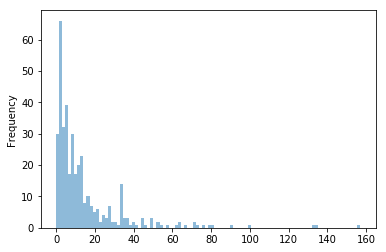

In [10]:
df['num_files'].plot.hist(bins=100, alpha=0.5)

**<big>Distribution of number of files.</big>**

In [11]:
# set the size and resolution of following plots.
plt.rcParams["figure.dpi"] = 200
plt.rcParams["figure.figsize"] = [6.4,4.8]

In [12]:
df_1 = df[['DOI', 'publication_date', 'total_size_kb', 'num_files']]
df_1 = df_1.sort_values(by='publication_date')
df_1.head()

,DOI,publication_date,total_size_kb,num_files
178,10.7910/DVN/OIHHPE,2012-04-04,2327.26,8
165,10.7910/DVN/O7DDIN,2012-05-30,360.44,4
98,10.7910/DVN/OMESOW,2012-05-30,1102.20,12
160,10.7910/DVN/NY6NSO,2012-06-15,377.05,6
109,10.7910/DVN/E5ZSZR,2012-06-28,226.65,3


In [13]:
df_1.loc[(df_1['num_files'] >= 0) & (df_1['num_files'] < 5), 'num_level'] = 1
df_1.loc[(df_1['num_files'] >= 5) & (df_1['num_files'] < 10), 'num_level'] = 2
df_1.loc[(df_1['num_files'] >= 10) & (df_1['num_files'] < 20), 'num_level'] = 3
df_1.loc[(df_1['num_files'] >= 20) & (df_1['num_files'] < 30), 'num_level'] = 4
df_1.loc[(df_1['num_files'] >= 30) & (df_1['num_files'] < 40), 'num_level'] = 5
df_1.loc[df_1['num_files'] >= 40, 'num_level'] = 6
df_1.head()

,DOI,publication_date,total_size_kb,num_files,num_level
178,10.7910/DVN/OIHHPE,2012-04-04,2327.26,8,2.0
165,10.7910/DVN/O7DDIN,2012-05-30,360.44,4,1.0
98,10.7910/DVN/OMESOW,2012-05-30,1102.20,12,3.0
160,10.7910/DVN/NY6NSO,2012-06-15,377.05,6,2.0
109,10.7910/DVN/E5ZSZR,2012-06-28,226.65,3,1.0


In [14]:
stat_1 = df_1.groupby('num_level')['DOI'].describe()
stat_1

,count,unique,top,freq
num_level,,,,
1.0,128,128,10.7910/DVN/SRLERE,1
2.0,86,86,10.7910/DVN/SDUGCC,1
3.0,86,86,10.7910/DVN/CPVIOF,1
4.0,28,28,10.7910/DVN/RPD7KA,1
5.0,24,24,10.7910/DVN/29405,1
6.0,29,29,10.7910/DVN/JQEUBQ,1


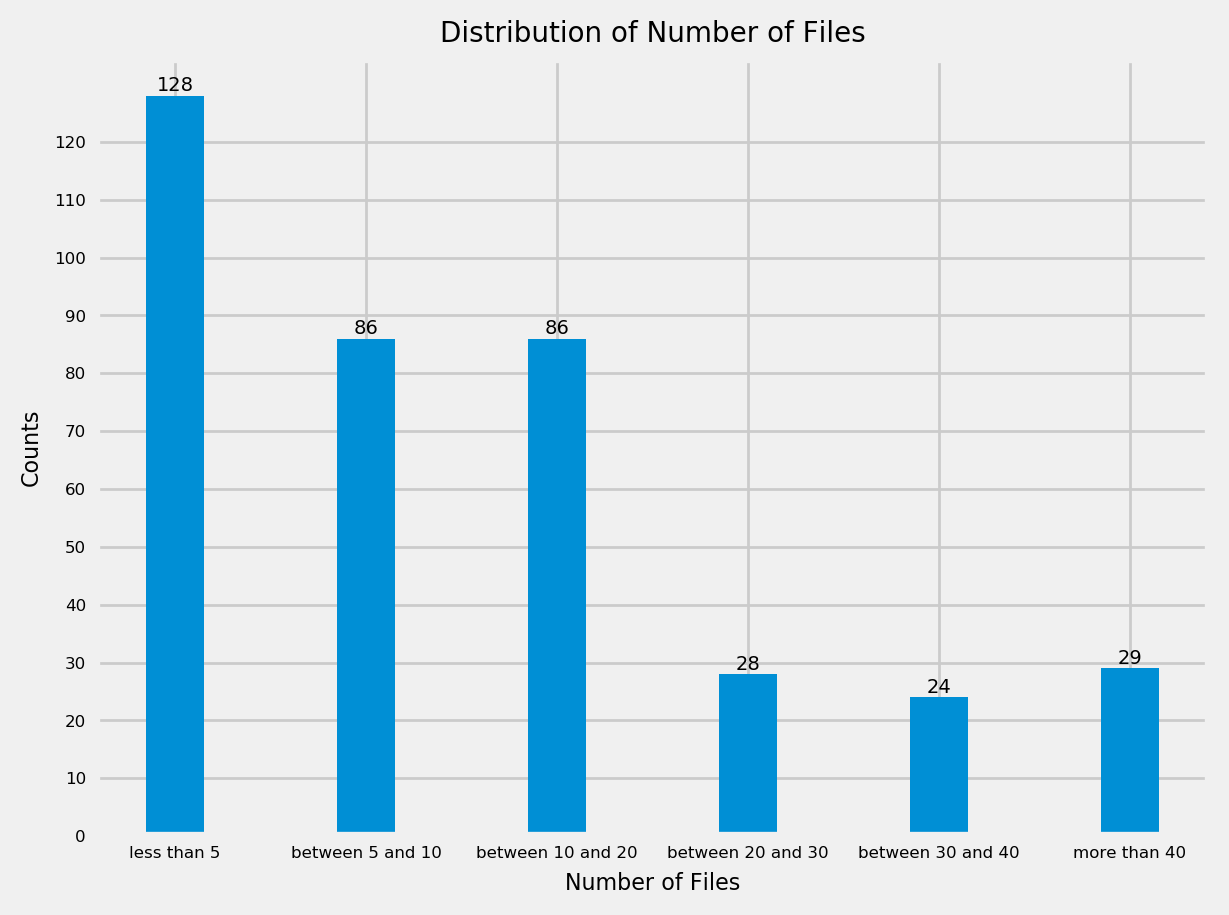

In [31]:
plt.style.use('fivethirtyeight')
x = stat_1.index
y = stat_1['count']
plt.bar(x, y,width = 0.3,align='center')
xtick = ['less than 5', 'between 5 and 10', 'between 10 and 20', 'between 20 and 30', 'between 30 and 40', 'more than 40']
plt.xticks(x,xtick,fontsize=6)
plt.yticks(np.linspace(0,120,13),fontsize=6)
plt.title('Distribution of Number of Files', fontsize=10)
plt.xlabel("Number of Files", fontsize=8)
plt.ylabel("Counts", fontsize=8)
for a,b in zip(x,y):
    plt.text(a, b+0.05, '%.0f' % b, ha='center', va= 'bottom',fontsize=7)
plt.show()

**<big>Distribution of total dataset size.</big>**

In [16]:
df_1['total_size_kb'].describe()

count    3.810000e+02
mean     1.248959e+05
std      5.418474e+05
min      0.000000e+00
25%      5.070300e+02
50%      2.777790e+03
75%      2.493203e+04
max      5.552596e+06
Name: total_size_kb, dtype: float64

In [17]:
df_1.loc[df_1['total_size_kb'] < 100, 'size_level'] = 1
df_1.loc[(df_1['total_size_kb'] >= 100) & (df_1['total_size_kb'] < 1000), 'size_level'] = 2
df_1.loc[(df_1['total_size_kb'] >= 1000) & (df_1['total_size_kb'] < 10000), 'size_level'] = 3
df_1.loc[(df_1['total_size_kb'] >= 10000) & (df_1['total_size_kb'] < 100000), 'size_level'] = 4
df_1.loc[df_1['total_size_kb'] > 100000, 'size_level'] = 5
df_1.head()

,DOI,publication_date,total_size_kb,num_files,num_level,size_level
178,10.7910/DVN/OIHHPE,2012-04-04,2327.26,8,2.0,3.0
165,10.7910/DVN/O7DDIN,2012-05-30,360.44,4,1.0,2.0
98,10.7910/DVN/OMESOW,2012-05-30,1102.20,12,3.0,3.0
160,10.7910/DVN/NY6NSO,2012-06-15,377.05,6,2.0,2.0
109,10.7910/DVN/E5ZSZR,2012-06-28,226.65,3,1.0,2.0


In [18]:
stat_2 = df_1.groupby('size_level')['DOI'].describe()
stat_2

,count,unique,top,freq
size_level,,,,
1.0,33,33,10.7910/DVN/26783,1
2.0,102,102,10.7910/DVN/SRLERE,1
3.0,117,117,10.7910/DVN/DZ1NFG,1
4.0,78,78,10.7910/DVN1/22651,1
5.0,51,51,10.7910/DVN/WVQ10L,1


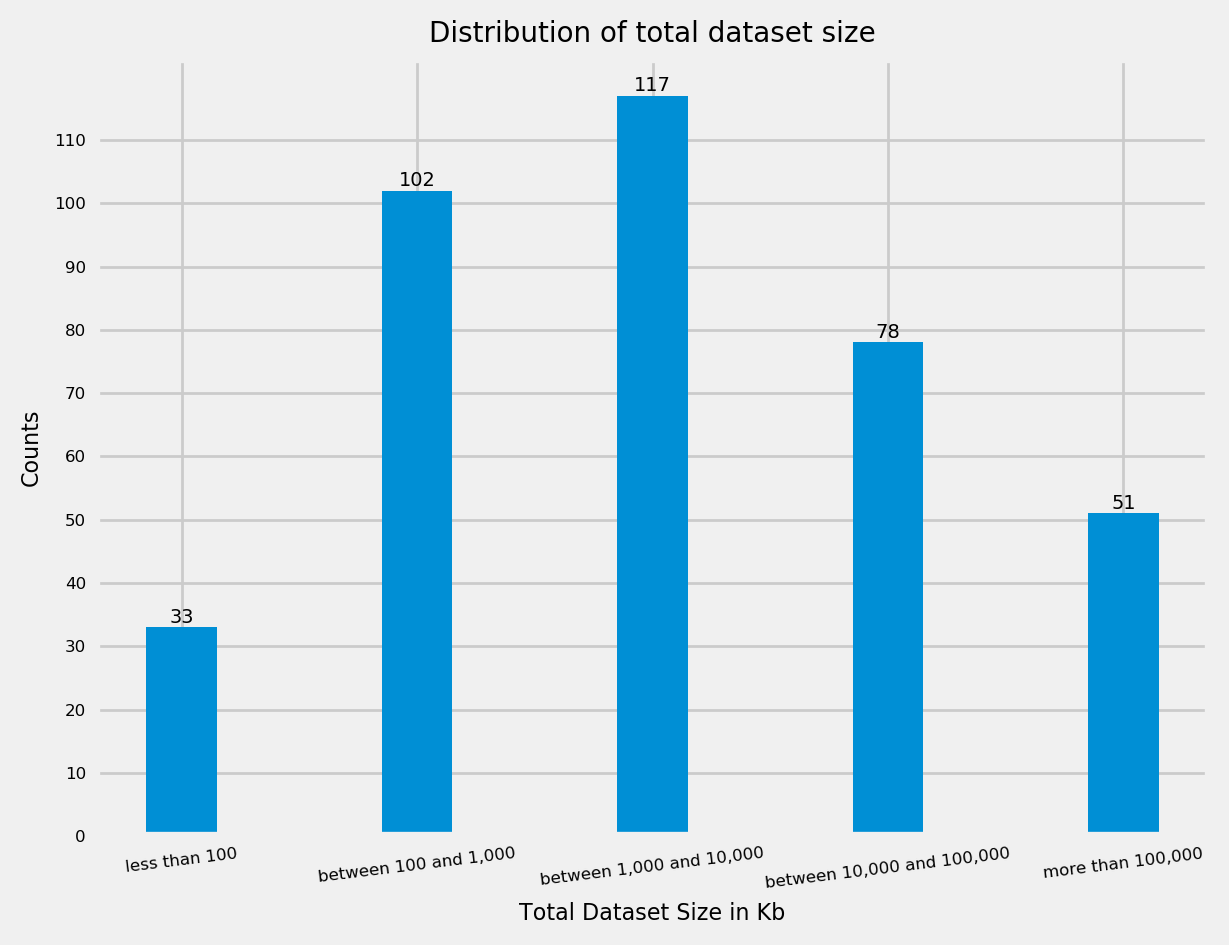

In [19]:
plt.style.use('fivethirtyeight')
x = stat_2.index
y = stat_2['count']
plt.bar(x, y,width = 0.3,align='center')
xtick = ['less than 100', 'between 100 and 1,000', 'between 1,000 and 10,000', 'between 10,000 and 100,000', 'more than 100,000']
plt.xticks(x,xtick,fontsize=6,rotation=7)
plt.yticks(np.linspace(0,110,12),fontsize=6)
plt.title('Distribution of total dataset size', fontsize=10)
plt.xlabel("Total Dataset Size in Kb", fontsize=8)
plt.ylabel("Counts", fontsize=8)
for a,b in zip(x,y):
    plt.text(a, b+0.05, '%.0f' % b, ha='center', va= 'bottom',fontsize=7)

**<big>Aggregated percent of files per language.</big>**

In [20]:
df.loc['Row_sum'] = df.apply(lambda x: x.sum())

In [21]:
df.loc['Row_sum']

DOI                 10.7910/DVN/2991110.7910/DVN/QJD1OW10.7910/DVN...
title               An Empirical Validation Study of Popular Surve...
publication_date    2015-04-062013-05-062014-06-192014-06-102013-0...
total_size_kb                                             4.75854e+07
num_files                                                        5514
codebook            ['validate-codebook.pdf'][][][][][][][][][][][...
verified_note                                                     205
bash                                                               10
stata                                                             812
julia                                                               0
python                                                             15
R                                                                 864
C                                                                   0
C++                                                                 0
Matlab              

In [22]:
x = []
y = []
lang_total_dict = dict(df.loc['Row_sum']['bash':'ArcGIS'])
for key in lang_total_dict.keys():
    if lang_total_dict[key] != 0:
        x.append(key)
        y.append(lang_total_dict[key])
for item in y:
    item = item / sum(y)
x,y

(['bash',
  'stata',
  'python',
  'R',
  'Matlab',
  'SAS',
  'SPSS',
  'Mathematica',
  'PHP',
  'Scilab',
  'ArcGIS'],
 [10, 812, 15, 864, 8, 5, 12, 5, 5, 13, 6])

In [23]:
lang_total_dict

{'bash': 10,
 'stata': 812,
 'julia': 0,
 'python': 15,
 'R': 864,
 'C': 0,
 'C++': 0,
 'Matlab': 8,
 'fortran': 0,
 'SAS': 5,
 'Java': 0,
 'SPSS': 12,
 'Mathematica': 5,
 'PHP': 5,
 'Scilab': 13,
 'ArcGIS': 6}

In [24]:
z =[]
for item in y:
    item = item / sum(y) * 100
    z.append(item)
z

[0.5698005698005698,
 46.267806267806264,
 0.8547008547008548,
 49.23076923076923,
 0.4558404558404558,
 0.2849002849002849,
 0.6837606837606838,
 0.2849002849002849,
 0.2849002849002849,
 0.7407407407407408,
 0.3418803418803419]

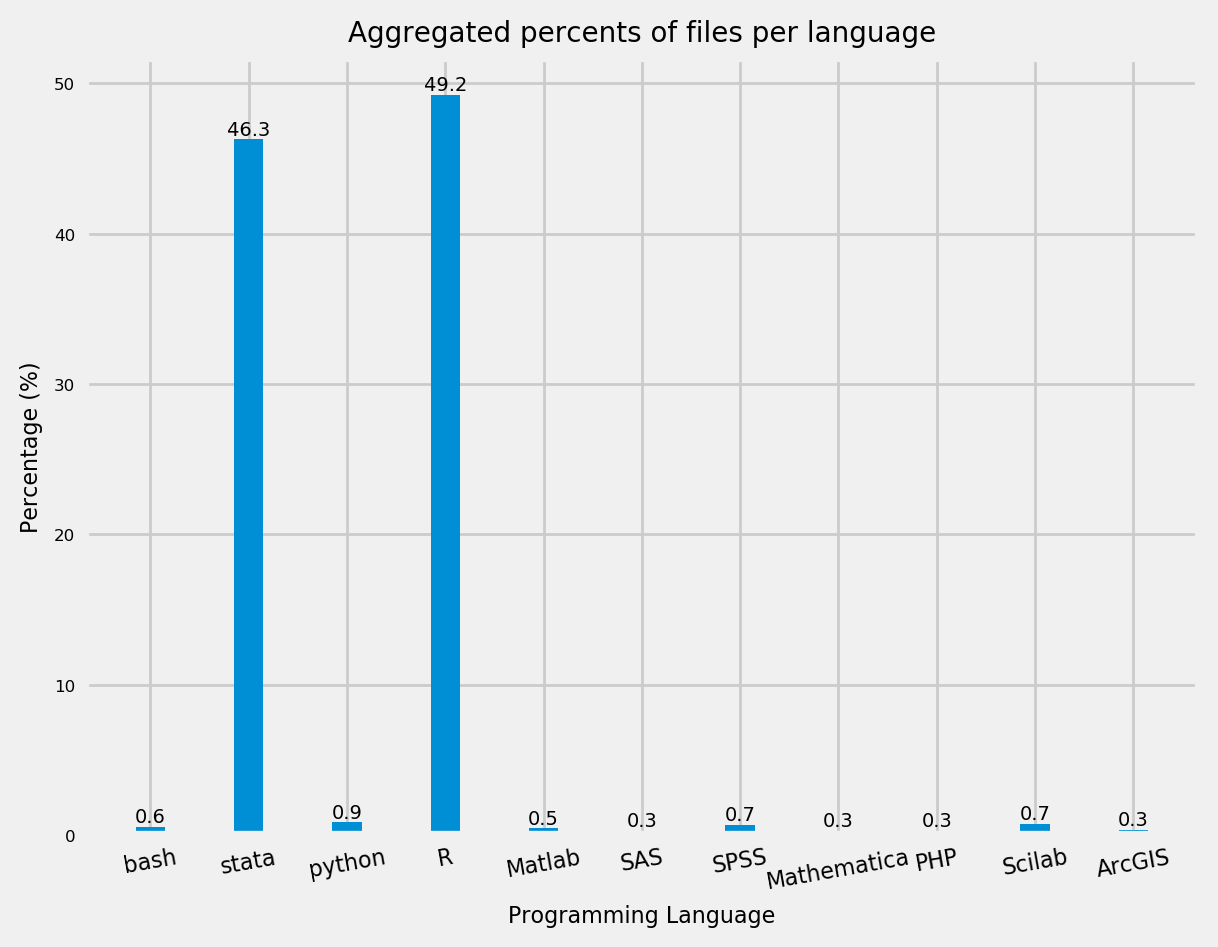

In [29]:
plt.style.use('fivethirtyeight')
plt.bar(x, z, width = 0.3,align='center')
plt.xticks(x,fontsize=8,rotation=10)
plt.yticks(np.arange(0,60,10), fontsize=6)
plt.title('Aggregated percents of files per language', fontsize=10)
plt.xlabel("Programming Language", fontsize=8)
plt.ylabel("Percentage (%)", fontsize=8)
for a,b in zip(x,z):
    plt.text(a, b+0.05, '%.1f' % b, ha='center', va= 'bottom',fontsize=7)

**<big>Proportion per Language over Time.</big>**

In [26]:
df.loc[df.publication_date.str[0:4] == '2019', 'pub_year'] = 2019
df.loc[df.publication_date.str[0:4] == '2018', 'pub_year'] = 2018
df.loc[df.publication_date.str[0:4] == '2017', 'pub_year'] = 2017
df.loc[df.publication_date.str[0:4] == '2016', 'pub_year'] = 2016
df.loc[df.publication_date.str[0:4] == '2015', 'pub_year'] = 2015
df.loc[df.publication_date.str[0:4] == '2014', 'pub_year'] = 2014
df.loc[df.publication_date.str[0:4] == '2013', 'pub_year'] = 2013
df.loc[df.publication_date.str[0:4] == '2012', 'pub_year'] = 2012
df = df[0:-1]
df.head()

,DOI,title,publication_date,total_size_kb,num_files,codebook,verified_note,bash,stata,julia,...,fortran,SAS,Java,SPSS,Mathematica,PHP,Scilab,ArcGIS,code_sum,pub_year
0,10.7910/DVN/29911,An Empirical Validation Study of Popular Surve...,2015-04-06,826713.75,37,['validate-codebook.pdf'],1,0,0,0,...,0,0,0,0,0,0,0,0,3,2015.0
1,10.7910/DVN/QJD1OW,Are Voters More Likely to Contribute to Other ...,2013-05-06,174202.83,2,[],0,0,0,0,...,0,0,0,0,0,0,0,0,0,2013.0
2,10.7910/DVN/26544,Identifying Judicial Empathy: Does Having Daug...,2014-06-19,4149.07,3,[],0,0,0,0,...,0,0,0,0,0,0,0,0,1,2014.0
3,10.7910/DVN/26467,Connecting the Candidates: Consultant Networks...,2014-06-10,8200.94,1,[],0,0,0,0,...,0,0,0,0,0,0,0,0,0,2014.0
4,10.7910/DVN/H6CUHY,The Power of Partisanship in Brazil: Evidence ...,2013-06-11,760.44,7,[],0,0,0,0,...,0,0,0,0,0,0,0,0,2,2013.0


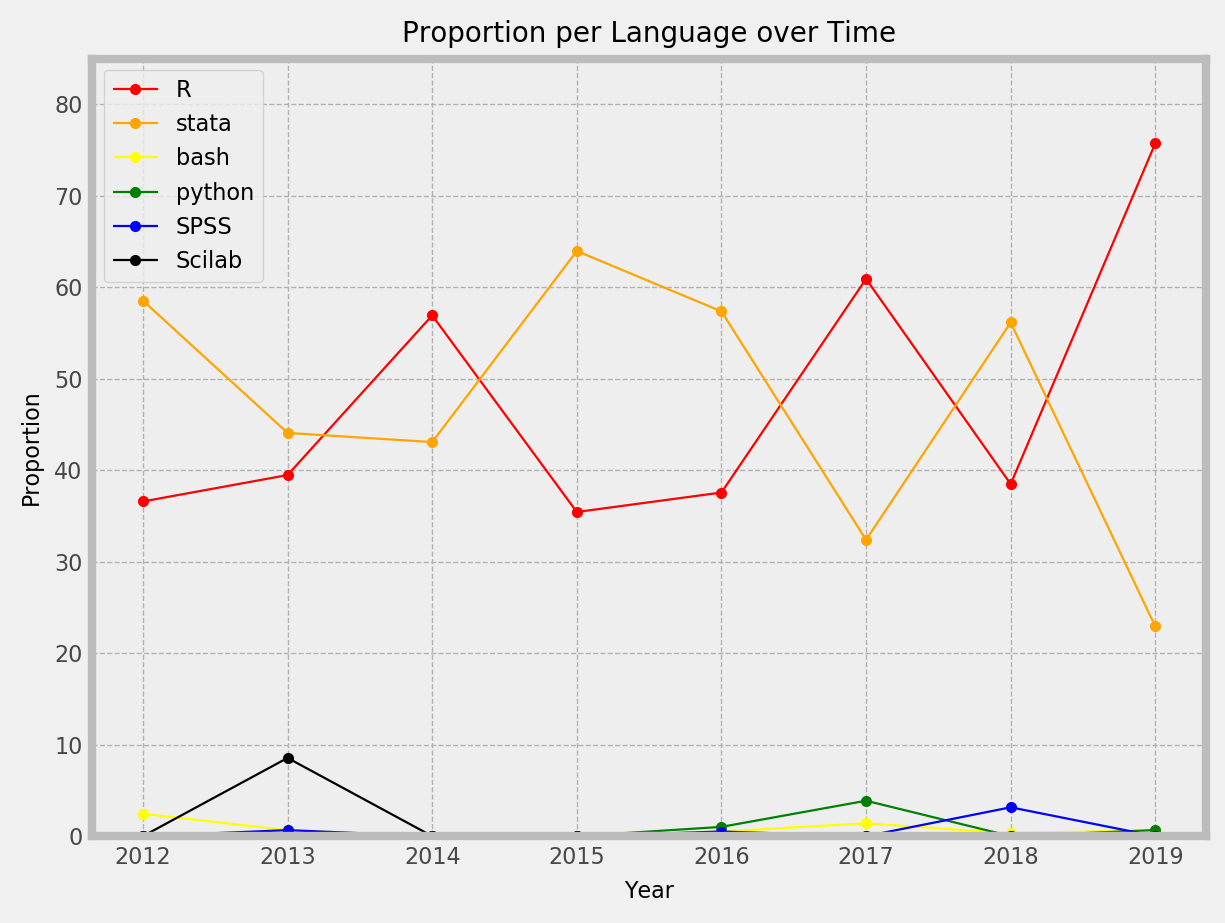

In [32]:
plt.style.use('bmh')
proportion = {'R': [], 'stata': [], 'bash': [], 'python':[], 'SPSS': [], 'Scilab':[]}
for language in ['R', 'stata', 'bash', 'python', 'SPSS', 'Scilab']:
    for year in np.arange(2012, 2020, 1):
        data = df[df['pub_year'] == year]
        count = data[language].sum()
        codesum = data['code_sum'].sum()
        proportion[language].append(count / codesum * 100)
# print(proportion)       
year = np.arange(2012, 2020, 1)
colors = ['red', 'orange', 'yellow', 'green', 'blue', 'black']
i = 0
for language in ['R', 'stata', 'bash', 'python', 'SPSS', 'Scilab']:
    plt.plot(year, proportion[language], linewidth = 0.8, marker = '.', label = language, color = colors[i])
    i += 1
plt.title('Proportion per Language over Time', fontsize=10)
plt.xlabel("Year", fontsize=8)
plt.ylabel("Proportion", fontsize=8)
plt.ylim(0, 85)
plt.xticks(np.arange(2012, 2020, 1), fontsize=8, horizontalalignment='center', alpha=.7)
plt.yticks(fontsize=8, alpha=.7)
plt.legend(loc='upper left', fontsize='xx-small')
plt.show()   